<img src="img/usmlogo.png" style="float:right;height:100px">
<img src="img/dilogo.png" style="float:left;height:60px">
<center>
<div>
    <center>
    <h1>Laboratorio 3 Estadística Computacional</h1>
    </center>
</div>
<div>
    <center>
    <br>
    <h5> Giorgio Pellizzari - 201473599-5 - Malla Nueva</h5>
    <h5> Felipe Vega - 201473511-1 - Malla Nueva</h5>
    <h6>9 de abril del 2018</h6>
    </center>
</div>
</center>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
from scipy import stats, special
import statsmodels.api as sm
import math
#import warnings
#warnings.filterwarnings('ignore')

# Ley de los Grandes Números

# Teorema de la Función Inversa

# Teorema del Límite Central

Sean
$$ X_1 \sim Exp(0.1) $$
$$ X_2 \sim Exp(0.5) $$
$$ X_3 \sim Exp(0.2) $$
$$ X_4 \sim Poi(1) $$
$$ X_5 \sim Poi(20) $$
$$ X_6 \sim Poi(50) $$
$$ X_7 \sim N(10, 5) $$
$$ X_8 \sim N(20, 30) $$
$$ X_9 \sim N(40, 50) $$

Nueve variables aleatorias independientes. Si se considera una nueva variable aleatoria $X_s$ igual a la suma de todas las variables aleatorias anteriores.

$$ X_s = \sum_{i = 1}^{9} X_{i} $$

El valor esperado de $X_s$ está dado por la siguiente expresión.

$$ E[X_s] = E\left[\sum_{i = 1}^{9}X_i\right] = \sum_{i = 1}^{9}E[X_i]$$

Además, como las variables son independientes, su varianza está dada por la siguiente expresión.

$$ V[X_s] = V\left[\sum_{i = 1}^{9}X_i\right] = \sum_{i = 1}^{9}V[X_i]$$

Con dichas expresiones se puede calcular la media y varianza teórica de $X_s$

$$ E[X_s] = 0.1 + 0.5 + 0.2 + 1 + 20 + 50 + 10 + 20 + 40 = 141.8$$
$$ V[X_s] = 0.1^2 + 0.5^2 + 0.2^2 + 1 + 20 + 50 + 5 + 30 + 50 = 156,3 $$ 

Para comprobar si se cumple lo dicho por el teorema del límite central se generan distintas muestras de tamaño $100000$, cada una correspondiente a las variables aleatorias antes mencionadas. Luego, como la suma se debería distribuir de manera normal  $\sim  N(E[X_s],V[X_s])$, se suman las medias y las varianzas de las muestras generadas.

In [7]:
np.random.seed(10)
n = 100000
x1 = np.random.exponential(0.1, n)
x2 = np.random.exponential(0.5, n)
x3 = np.random.exponential(0.2, n)
x4 = np.random.poisson(1, n)
x5 = np.random.poisson(20, n)
x6 = np.random.poisson(50, n)
x7 = np.random.normal(10,5**(1/2), n)
x8 = np.random.normal(20, 30**(1/2), n)
x9 = np.random.normal(40, 50**(1/2), n)

media = np.mean(x1) + np.mean(x2) + np.mean(x3) + np.mean(x4) + np.mean(x5) + np.mean(x6) + np.mean(x7) + np.mean(x8) + np.mean(x9)
varianza = np.var(x1) + np.var(x2) + np.var(x3) + np.var(x4) + np.var(x5) + np.var(x6) + np.var(x7) + np.var(x8) + np.var(x9)
print("La suma de medias es: " + str(media))
print("La suma de varianzas es: "+ str(varianza))

La suma de medias es: 141.774576676
La suma de varianzas es: 156.345655073


Se obtiene una media y varianza de $141.8$ y $156.3$ aproximadamente, lo cual concuerda con los valores teóricos obtenidos anteriormente.

De esta manera $X_s \sim N(141.8, 156.3)$, por lo que se puede expresar como estándar de la siguiente manera.

$$ N(x; 141.8, 156.3) = N\left(\frac{x - 141.8}{156.3}, 1, 0\right) = \Phi\left(\frac{x - 141.8}{156.3}\right)  $$

Lo cual se logra dividiendo la diferencia entre la variable aleatoria con su media.

# Estudio de Tiempos de Vida

Un gráfico _Cuantil-Cuantil_ (_Q-Q plot_) es una técnica para comparar gráficamente dos distribuciones de probabilidad. En este, se considera un intervalo desde el cual se seleccionan los cuantiles para luego graficar los puntos $(x_i,y_i)$, donde cada $x_i$ corresponde al cuantil $i$ de la primera distribución y $y_i$ es el cuantil $i$ de la segunda distribución.

En el caso de que las distribuciones sean similares, los pares coordenados tenderán a ubicarse en la recta $x = y$. Si producen una recta, pero no la $x = y$, significa que las distribuciones están linealmente relacionadas.

Este tipo de gráficos tiene distintas utilizades, entre las que se encuentra la comparación de muestras frente a una distribución teórica, ver si el sesgo, parámetros de escala y las medidas de tendencia central, son similares entre dos distribuciones.

En este caso, se utilizará para comparar una muestra de tiempos de vida de un determinado electrodoméstico contra seis distribuciones de Weibull. Se procede a graficar la muestra proporcionada en el archivo _"muestra1.csv"_ en seis Q-Q plot con las distintas distribuciones. Además, se grafica la recta $y = x$ con $x, y \in [6,12]$(el dominio fue determinado previa inspección de los cuantiles de la muestra) para ver que tanto se ajustan los pares coordenados a dicha recta.

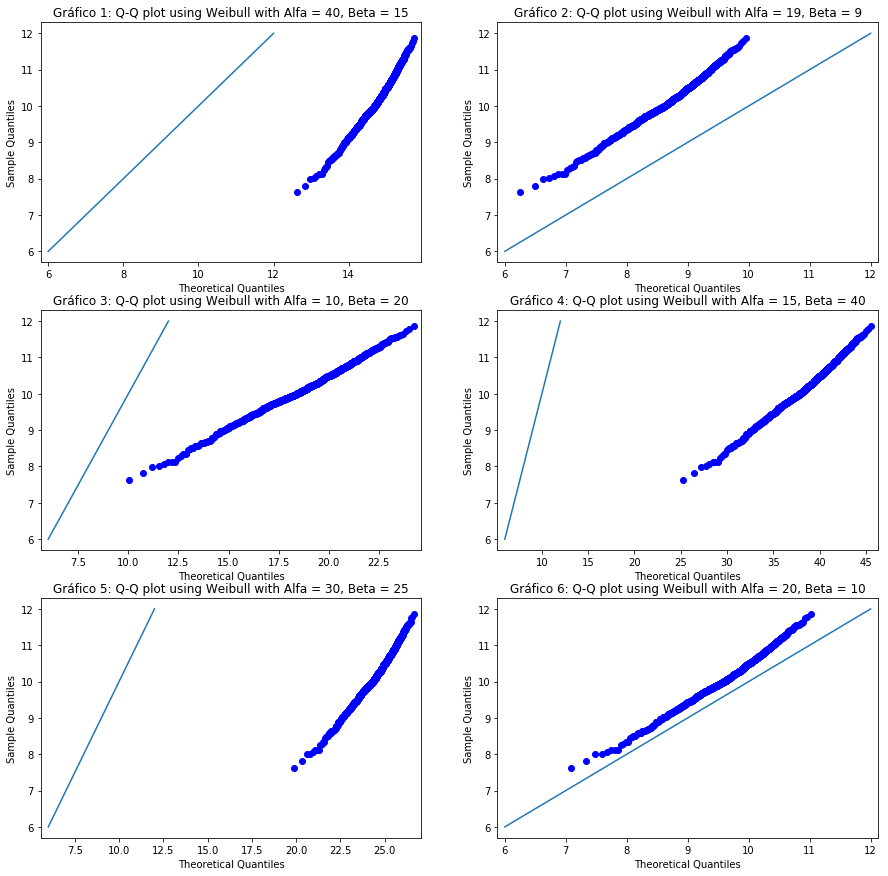

In [3]:
muestra1 = pd.read_csv('muestra1.csv')

x = [6,7,8,9,11,12]
y = [6,7,8,9,11,12]


fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(15,15))
sm.qqplot(muestra1['valor'], stats.weibull_min,distargs=(40,),scale=15,ax=axes[0][0])
axes[0][0].plot(x,y)
axes[0][0].set_title('Gráfico 1: Q-Q plot using Weibull with Alfa = 40, Beta = 15')

sm.qqplot(muestra1['valor'], stats.weibull_min,distargs=(19,),scale=9,ax=axes[0][1])
axes[0][1].plot(x,y)
axes[0][1].set_title('Gráfico 2: Q-Q plot using Weibull with Alfa = 19, Beta = 9')

sm.qqplot(muestra1['valor'], stats.weibull_min, distargs=(10,),scale=20,ax=axes[1][0])
axes[1][0].plot(x,y)
axes[1][0].set_title('Gráfico 3: Q-Q plot using Weibull with Alfa = 10, Beta = 20')

sm.qqplot(muestra1['valor'], stats.weibull_min, distargs=(15,),scale=40,ax=axes[1][1])
axes[1][1].plot(x,y)
axes[1][1].set_title('Gráfico 4: Q-Q plot using Weibull with Alfa = 15, Beta = 40')

sm.qqplot(muestra1['valor'], stats.weibull_min, distargs=(30,), scale=25,ax=axes[2][0])
axes[2][0].plot(x,y)
axes[2][0].set_title('Gráfico 5: Q-Q plot using Weibull with Alfa = 30, Beta = 25')

sm.qqplot(muestra1['valor'], stats.weibull_min, distargs=(20,),scale=10,ax=axes[2][1])
axes[2][1].plot(x,y)
axes[2][1].set_title('Gráfico 6: Q-Q plot using Weibull with Alfa = 20, Beta = 10')
plt.show()

Como se puede observar, la muestra tiene una relación lineal con todas las distribuciones pues se observa que los puntos graficados forman una especie de recta. Bajo esta misma inspección, se ve que la distribución con parámetros $\alpha = 20$, $\beta = 10$ (grafico 6) es la que mejor se ajusta a la muestra de datos, debido a que es donde más se acercan los pares coordenados a la recta $y = x$.

# Verosimilitud

Para estimar los parámetros que posee una determinada muestra(considerando una determinada distribución) existen variados métodos, en este caso se utilizará el método de la _Máxima Versimilitud_, el cual consiste en encontrar los valores máximos de la función de Verosimilitud.

$$ L(x|\theta) =  \prod_{i = 1}^{N} f(x_i|\theta)$$

Debido a la forma de esta, y aprovechando las propiedades de la función logaritmo, se suele utilizar la función _Log-Verosimilitud_, con la cual se obtiene el mismo resultado.

$$ l(x|\theta) = \sum_{i = 1}^{N} ln(f(x_i|\theta))$$

Para encontrar el máximo de la función _Log-Verosimilitud_ se utilizará el método de _Newton-Raphson_, un método iterativo el cual sirve para encontrar las raíces de una función real derivable. 

$$ x_{i + 1} = x_{i} + \frac{f(x_i)}{f'(x_i)}$$

Dado que encontrar el máximo de una función es equivalente a encontrar las raíces de su primera derivada, el método de Newton-Raphson quedaría de la siguiente manera.

$$ \theta_{i + 1} = \theta_{i} + \frac{l'(x|\theta_i)}{l''(x|\theta_i)}$$

Considerando una distribución Gamma con parámetro $\alpha$ desconocido y $\beta = 1$. 

$$ f(x) = \frac{1}{\Gamma(\alpha)} \cdot x^{\alpha - 1} \cdot e^{-x} $$

Al aplicar la función Log-Verosimilitud y derivar, se obtienen las primera dos derivadas necesarias para el método

$$l'(x|\alpha) = -N \cdot \frac{\Gamma'(\alpha)}{\Gamma(\alpha)} + \sum_{i = 1}^{N}ln(x_i)$$

$$l''(x|\alpha) = -N \cdot \left( \frac{\Gamma'(\alpha)}{\Gamma(\alpha)} \right)' $$

Con $x_i$ el elemento $i$ de la muestra a utilizar, $N$ la cantidad de elementos en la muestra y $\alpha$ el parámetro a utilizar.En este caso la muestra se encuentra en el archivo _"gamma.csv"_. 

Se programa ambas derivadas y se implementa el método de Newton-Raphson, considerando $\alpha_0 = 0.2$ y un umbral de detención de $u = 0.0000001$, es decir, el método se detendrá cuando la diferencia entre $\alpha_{i + 1}$ y $\alpha_{i}$ sea menor a dicho umbral.

In [12]:
def primeraDerivada(alpha, n, sumatoria):
    return (-n * special.digamma(alpha)) + sumatoria 
    
def segundaDerivada(alpha, n):
    return (-n * special.polygamma(1, alpha))

alpha = 0.2
newalpha = 0

umbral = 0.0000001

muestra = pd.read_csv('gamma.csv')
n = len(muestra['x'])
sumatoria = 0

for i in muestra['x']:
    sumatoria += math.log(i)

while(True):
    newalpha = alpha - (primeraDerivada(alpha, n, sumatoria)/segundaDerivada(alpha, n))
    if(abs(newalpha - alpha)< umbral):
        alpha = newalpha
        break
    alpha = newalpha
print(alpha)

2.60349215342


Aplicando el método, se obtiene que el estimador máximo verosimil de $\alpha$ es de 2.60349215342.